In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Задача 1

Постройте график Назовите график Сделайте именование оси x и оси y Сделайте выводы

### 1.1

Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [22]:
df = pd.read_csv('kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2

Изучите стоимости недвижимости

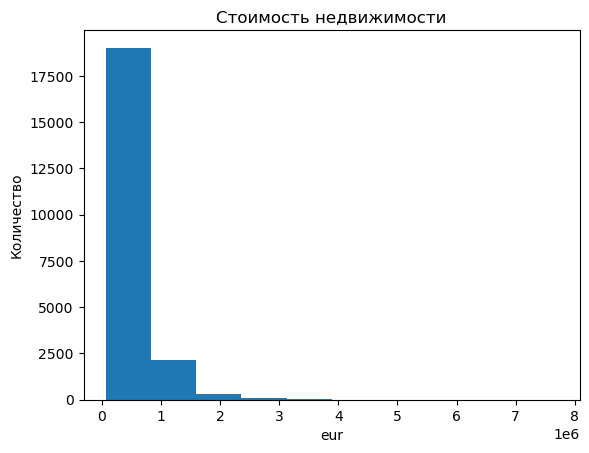

In [23]:
plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('eur')
plt.ylabel('Количество');

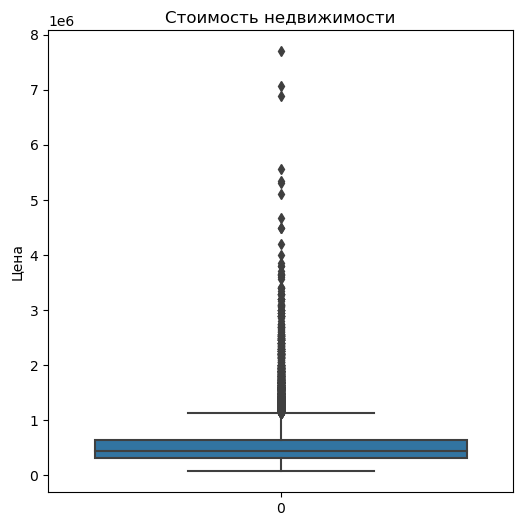

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df['price'])
plt.title('Стоимость недвижимости')
plt.ylabel('Цена');

Из данных графиков очевидно, что стоимость большнства домов находится в интервале от 200. тыс. до 1 млн.

### 1.3

Изучите распределение квадратуры жилой

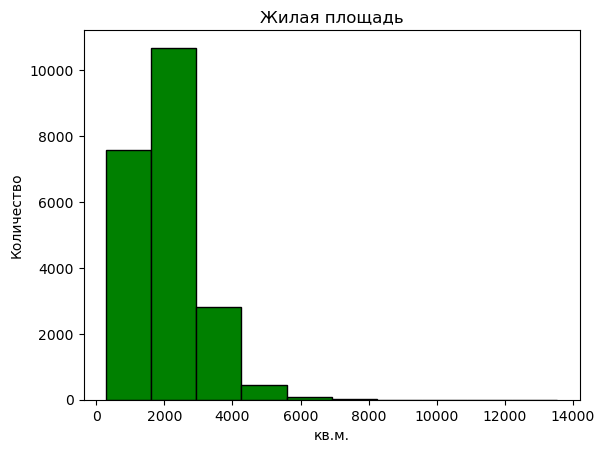

In [25]:
plt.hist(df['sqft_living'], color='g', edgecolor='black')
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.ylabel('Количество');

Большая часть домов имеет площадь около 2000 кв.м

### 1.4

Изучите распределение года постройки

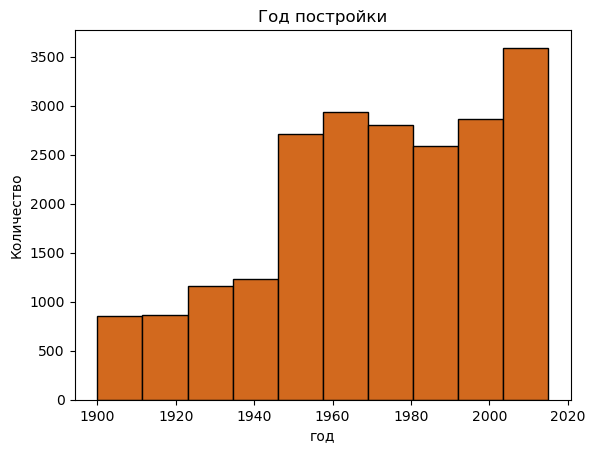

In [26]:
plt.hist(df['yr_built'], color='chocolate', edgecolor='black')
plt.title('Год постройки')
plt.xlabel('год')
plt.ylabel('Количество');

Большинство домов построено во второй половине XX века и начале XXI века.

## Задача 2

Постройте график Сделайте выводы

### 2.1

Изучите распределение домов от наличия вида на набережную

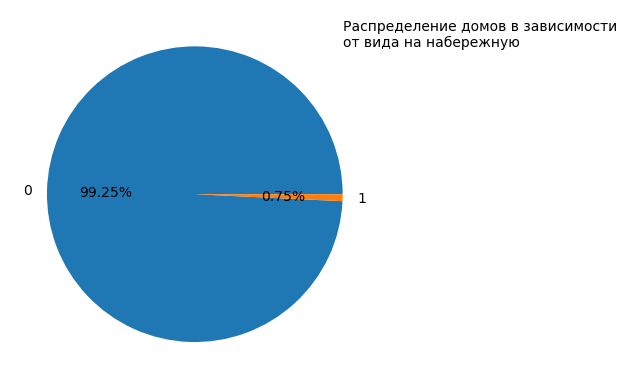

In [27]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values
plt.pie(values, autopct='%.2f%%', labels=names)
plt.text(1, 1, 'Распределение домов в зависимости\nот вида на набережную');

99.25% домов не имеют вида на набережную.

### 2.2

Изучите распределение этажей домов

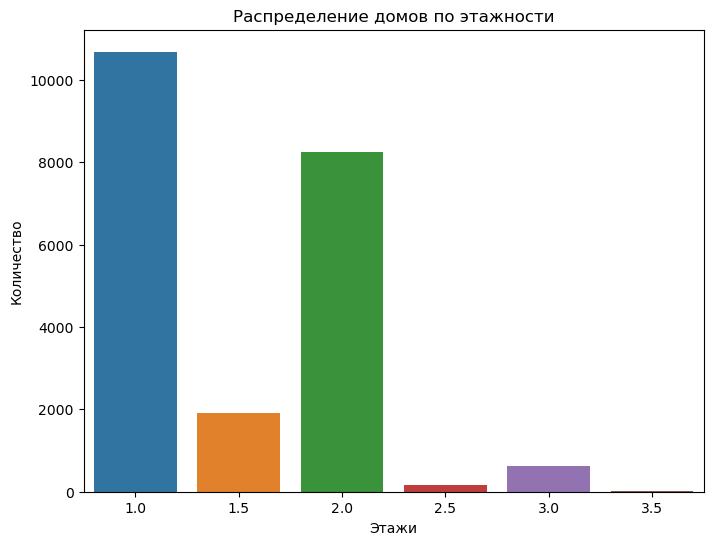

In [28]:
data=df['floors'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x = data.index, y = data.values)
plt.title('Распределение домов по этажности')
plt.xlabel('Этажи')
plt.ylabel('Количество');

Наибольшее количество домов занимает 1 этаж. Также большинство домов имеют полное количество этажей

### 2.3

Изучите распределение состояния домов

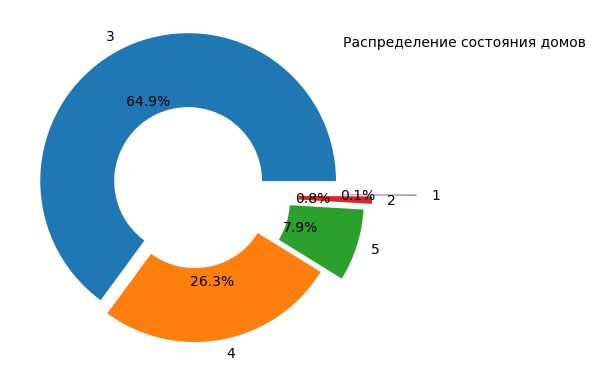

In [29]:
data = df['condition'].value_counts()
names = data.index
# print(data.index.values)
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names, wedgeprops=dict(width=0.5), explode= (0.1, 0, 0.15, 0.2, 0.5))
plt.text(1, 1, 'Распределение состояния домов');

64.9% домов имеют среднее состояние.

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

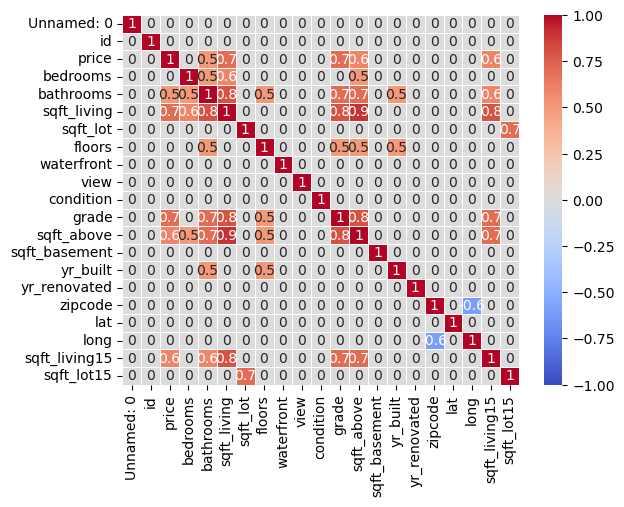

In [30]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
sns.heatmap(corr_matrix, linewidths=0.7, cmap='coolwarm', annot = True, vmin=-1, vmax=1, center= 0);

С помощью матрицы корреляции определяем связанные показатели в данных. В ней мы исключаем данные о слабой корреляции, чтобы не перегружать матрицу.

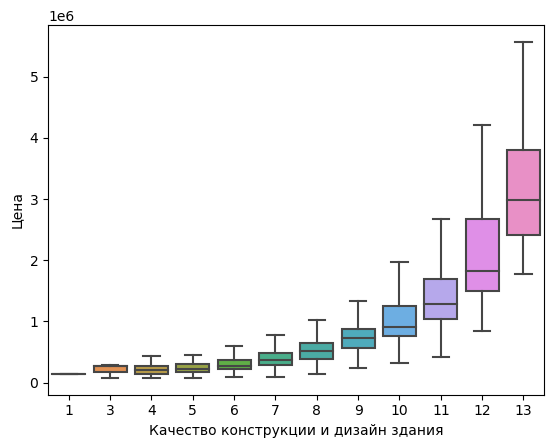

In [31]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.xlabel('Качество конструкции и дизайн здания')
plt.ylabel('Цена');

На данном графике можно увидеть соотношение качества конструкции и дизайна здания с его ценой. При этом видно что здания с плохой конструкцией и некачественным дизайном практически не отличаются в цене, но с увеличением этого показателя цена здания существенно повышается, в том числе растет и её ценовой диапазон.

Влияние жилой площади


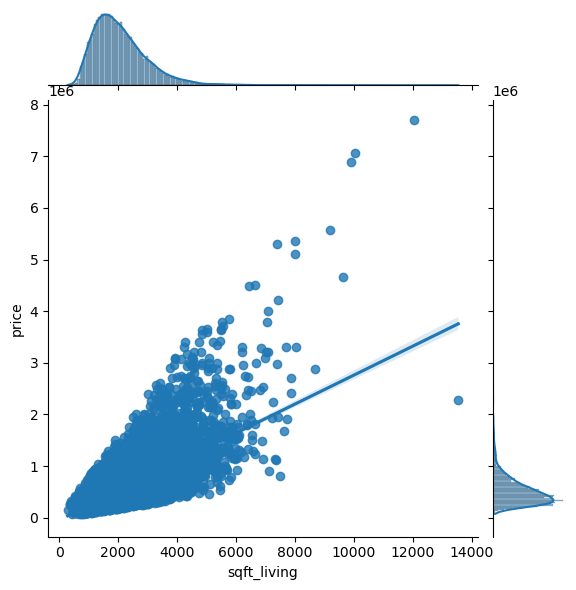

In [32]:
print("Влияние жилой площади")
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

На данном графие можно увидеть влияние жилой площади на цену. Из графика можно сделать вывод: стоимость домов имеют прямую линейную зависимость от значения жилой площади. Эту же зависимость можно увидеть оценивая влияние жилой площади ближайших 15 домов.

Влияние жилой площади ближайших 15 домов


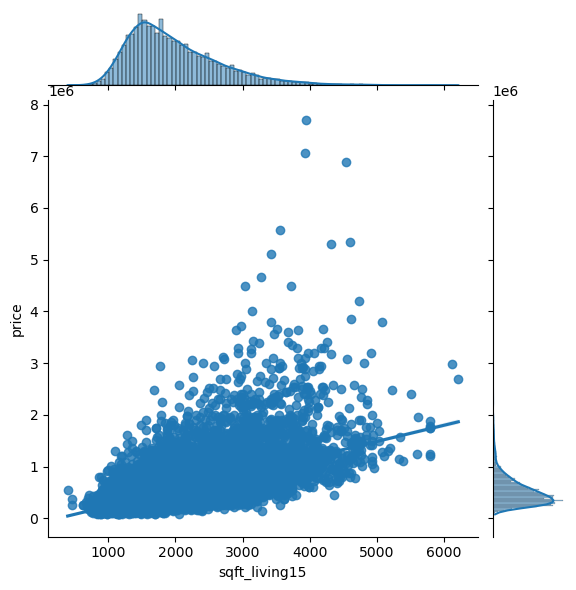

In [33]:
print('Влияние жилой площади ближайших 15 домов')
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg');

Также можно рассмотреть зависимость цены от количества спален и ванных комнат несмотря на то, что судя по матрице корреляция низкая, было бы логично предположить такую зависимость.

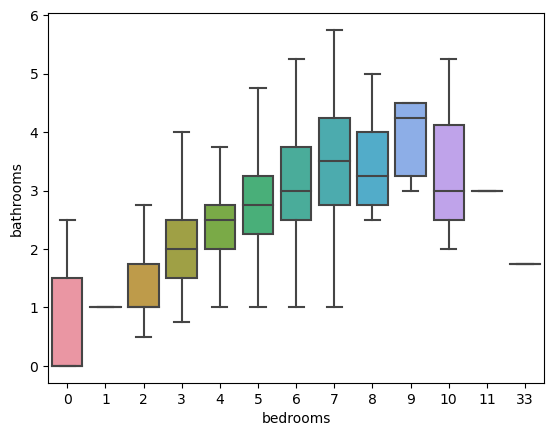

In [34]:
sns.boxplot(x=df['bedrooms'], y=df['bathrooms'], showfliers=False);

В данных виден выброс в виде 33 спален.

In [35]:
print(df['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [36]:
df[df['bedrooms']==33]['sqft_living']

15870    1620
Name: sqft_living, dtype: int64

In [37]:
df[df['bedrooms']==33]['price']

15870    640000.0
Name: price, dtype: float64

In [38]:
df[(df['bedrooms']==3) & (df['sqft_living'] >= 1620)]['price'] 

1        538000.0
4        510000.0
6        257500.0
8        229500.0
9        323000.0
           ...   
21580    594866.0
21581    625000.0
21585    270000.0
21589    347500.0
21603    507250.0
Name: price, Length: 5413, dtype: float64

Таким образом можно заменить 33 спальни на 3.

In [39]:
df.loc[df['bedrooms']==33,['bedrooms']]=3 

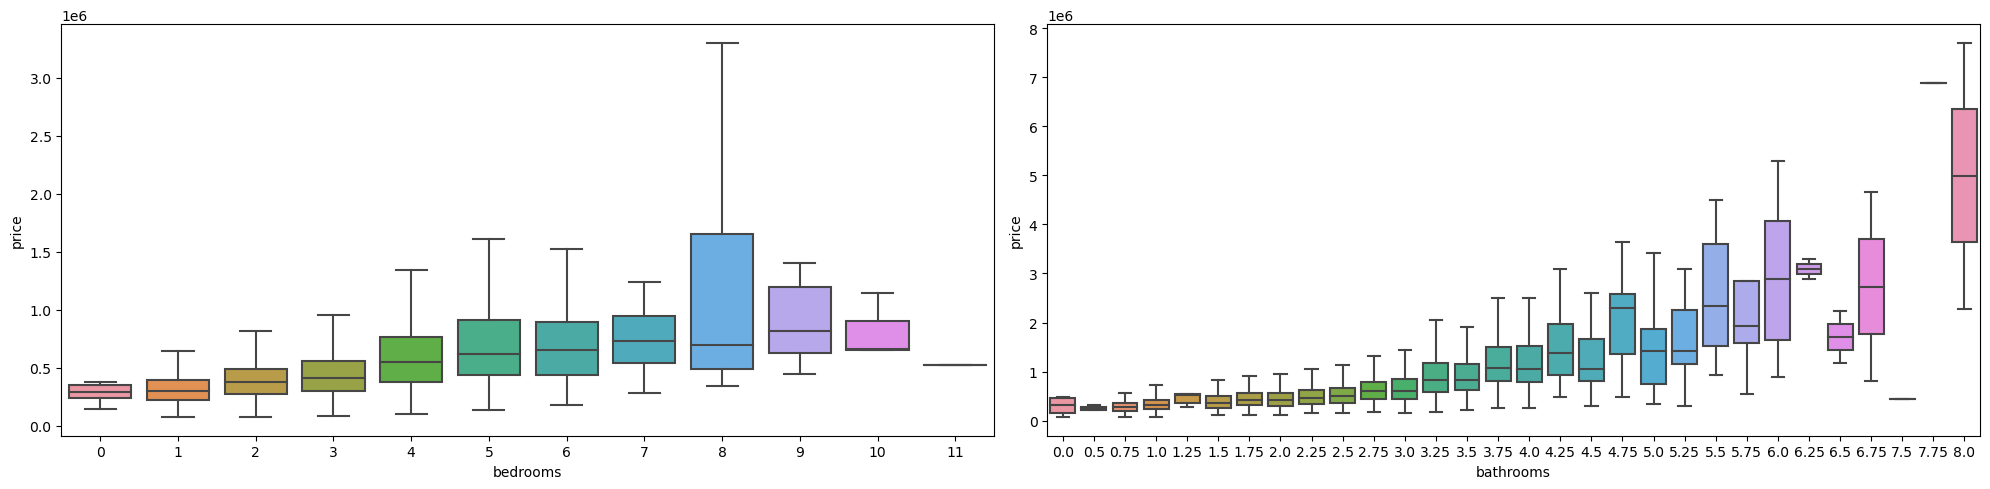

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.boxplot(x=df['bedrooms'], y=df['price'], showfliers=False, ax=axs[0]) 
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False, ax=axs[1])
plt.tight_layout()
plt.show();

В данном случае цена дома увеличивается с увелечением спален, но достаточно плавно, с увеличением количества спален более 9 цена снижается, также цена дома с 8 спальнями ниже, чем с 7 и 9 спальнями. С увелечением количества ванных комнат в целом наблюдается рост стоимости, но в тоже время наблюдается хаотичность на интервале, где количество варьируется от 4,25 до 6,75 и стремительный рост цены домов с 8 ванными комнатами.